# Overfitting

In [2]:
import numpy as np
import sklearn.tree

import matplotlib.pyplot as plt
plt.style.use("seaborn")

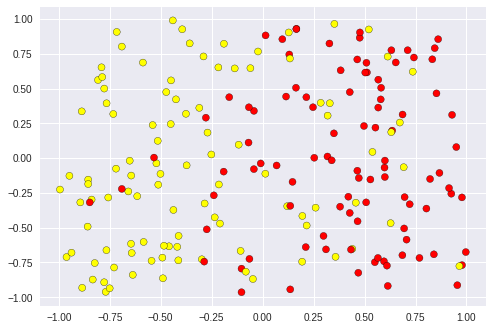

In [12]:
N=200
X=np.array([2*np.random.random(size=N)-1,2*np.random.random(size=N)-1]).T

def rnd_class(x):
    if 2*np.random.random()-1<x[0]:
        return -1
    return 1

y=np.array([rnd_class(x) for x in X])

colourmap='autumn' # because it's autumn
_,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap=colourmap)

In [13]:
full_tree=sklearn.tree.DecisionTreeClassifier()
full_tree.fit(X,y)

small_tree=sklearn.tree.DecisionTreeClassifier(max_depth=1)
small_tree.fit(X,y)

DecisionTreeClassifier(max_depth=1)

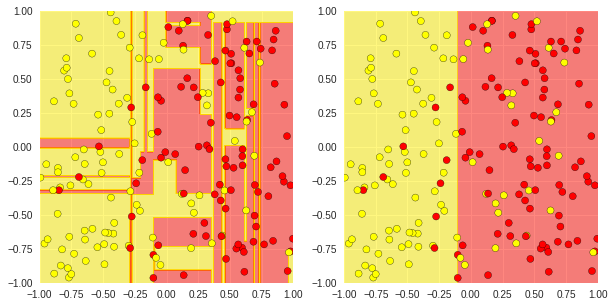

In [17]:
# code to plot decision boundary
# best to ignore this
resolution=500
L=np.linspace(-1,1,resolution)
XX,YY=np.meshgrid(L,L)

_,axs=plt.subplots(1,2,figsize=(10,5))
for ax,dt in zip(axs,[full_tree,small_tree]):
    Z=dt.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    ax.contourf(XX,YY,Z,alpha=0.5,cmap=colourmap)  # alpha controls opacity, but here only serves to fade out the colours a bit 
    ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap=colourmap)
    #ax.set_title('Max depth {}'.format(i+1))

In [18]:
from sklearn.neighbors import KNeighborsClassifier

one_nn=KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X,y)
ten_nn=KNeighborsClassifier(n_neighbors=10)
ten_nn.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

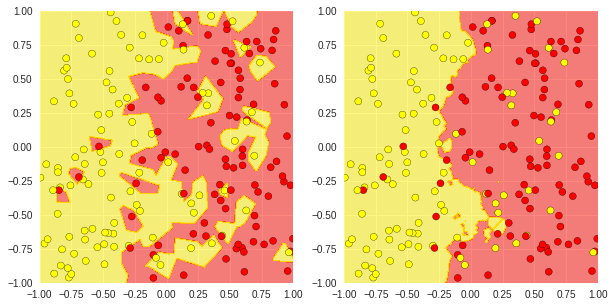

In [19]:
resolution=500
L=np.linspace(-1,1,resolution)
XX,YY=np.meshgrid(L,L)

_,axs=plt.subplots(1,2,figsize=(10,5))
for ax,dt in zip(axs,[one_nn,ten_nn]):
    Z=dt.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    ax.contourf(XX,YY,Z,alpha=0.5,cmap=colourmap)  # alpha controls opacity, but here only serves to fade out the colours a bit 
    ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap=colourmap)
    #ax.set_title('Max depth {}'.format(i+1))